# Numpy -  多维数据的数组

J.R. Johansson (jrjohansson at gmail.com)

最新的[IPython notebook](http://ipython.org/notebook.html)课程可以在[http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures) 找到.

其他有关这个课程的参考书在这里标注出[http://jrjohansson.github.io](http://jrjohansson.github.io).


In [1]:
# 这一行的作用会在课程4中回答
%matplotlib inline
import matplotlib.pyplot as plt

## 简介

这个`numpy`包(模块)用在几乎所有使用Python的数值计算中。他是一个为Python提供高性能向量，矩阵和高维数据结构的模块。它是用C和Fortran语言实现的，因此当计算被向量化（用向量和矩阵表示）时，性能非常的好。

为了使用`numpy`模块，你先要向下面的例子一样导入这个模块：

In [2]:
from numpy import *
import numpy as np

在`numpy`模块中，用于向量，矩阵和高维数据集的术语是*数组*。



## 创建`numpy`数组

有很多种方法去初始化新的numpy数组, 例如从

* Python列表或元组
* 使用专门用来创建numpy arrays的函数，例如 `arange`, `linspace`等
* 从文件中读取数据

### 从列表中

例如，为了从Python列表创建新的向量和矩阵我们可以用`numpy.array`函数。


In [3]:
import numpy as np

# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [4]:
# 矩阵:数组函数的参数是一个嵌套的Python列表
M = array([[1, 2], [3, 4], [5, 6]])

print(M)
print(M.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


`v`和`M`两个都是属于`numpy`模块提供的`ndarray`类型。

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

`v`和`M`之间的区别仅在于他们的形状。我们可以用属性函数`ndarray.shape`得到数组形状的信息。

In [6]:
v.shape

(4,)

In [7]:
M.shape

(3, 2)

通过属性函数`ndarray.size`我们可以得到数组中元素的个数

In [8]:
M.size

6

同样，我们可以用函数`numpy.shape`和`numpy.size`

In [9]:
np.shape(M)

(3, 2)

In [10]:
np.size(M)

6

到目前为止`numpy.ndarray`看起来非常像Python列表(或嵌套列表)。为什么不简单地使用Python列表来进行计算，而不是创建一个新的数组类型?

下面有几个原因：

* Python列表非常普遍。它们可以包含任何类型的对象。它们是动态类型的。它们不支持矩阵和点乘等数学函数。由于动态类型的关系，为Python列表实现这类函数的效率不是很高。
* Numpy数组是**静态类型的**和**同构的**。元素的类型是在创建数组时确定的。
* Numpy数组是内存高效的。
* 由于是静态类型，数学函数的快速实现，比如“numpy”数组的乘法和加法可以用编译语言实现(使用C和Fortran).

利用`ndarray`的属性函数`dtype`（数据类型），我们可以看出数组的数据是那种类型。


In [11]:
M.dtype

dtype('int64')

如果我们试图给一个numpy数组中的元素赋一个错误类型的值，我们会得到一个错误:

In [12]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

如果我们想的话，我们可以利用`dtype`关键字参数显式地定义我们创建的数组数据类型：

In [13]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

常规可以伴随`dtype`使用的数据类型是：`int`, `float`, `complex`, `bool`, `object`等

我们也可以显式地定义数据类型的大小，例如：`int64`, `int16`, `float128`, `complex128`。

### 使用数组生成函数

对于较大的数组，使用显式的Python列表人为地初始化数据是不切实际的。除此之外我们可以用`numpy`的很多函数得到不同类型的数组。有一些常用的分别是：

#### arange

In [14]:
# 创建一个范围

x = np.arange(0, 10, 1) # 参数：start, stop, step: 
y = range(0, 10, 1)
print(x)
print(list(y))

[0 1 2 3 4 5 6 7 8 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [16]:
# 使用linspace两边的端点也被包含进去
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [17]:
np.logspace(0, 10, 10, base=e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [18]:
x, y = np.mgrid[0:5, 0:5] # 和MATLAB中的meshgrid类似

In [19]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [20]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [21]:
from numpy import random

In [22]:
# 均匀随机数在[0,1)区间
random.rand(5,5)

array([[0.31850549, 0.64755869, 0.93737096, 0.06141188, 0.17055487],
       [0.95771684, 0.88466718, 0.81119863, 0.95268744, 0.73734857],
       [0.51036326, 0.8779331 , 0.41560197, 0.300393  , 0.42244209],
       [0.50866631, 0.84322931, 0.34459543, 0.47379641, 0.03312725],
       [0.96519922, 0.20557788, 0.38343937, 0.21493144, 0.27541461]])

In [23]:
# 标准正态分布随机数
random.randn(5,5)

array([[ 1.12204579,  2.90667688, -1.06379302,  1.52801804,  1.34553205],
       [ 2.22610261, -0.18597008,  1.12948162, -1.44339033,  0.14366645],
       [ 0.12767746, -0.04534549,  0.1536468 ,  0.7333602 ,  0.96510913],
       [ 0.30848743, -2.31710677,  0.37803085, -0.52433003,  1.39883453],
       [-0.52307504,  0.40612781,  0.48341866, -1.96277249,  1.1671546 ]])

#### diag

In [24]:
# 一个对角矩阵
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [25]:
# 从主对角线偏移的对角线
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [26]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [27]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 文件 I/O

### 逗号分隔值 (CSV)

对于数据文件来说一种非常常见的文件格式是逗号分割值（CSV），或者有关的格式例如TSV（制表符分隔的值）。为了从这些文件中读取数据到Numpy数组中，我们可以用`numpy.genfromtxt`函数。例如：

In [28]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [29]:
import numpy as np
data = np.genfromtxt('stockholm_td_adj.dat')

In [30]:
data.shape

(77431, 7)

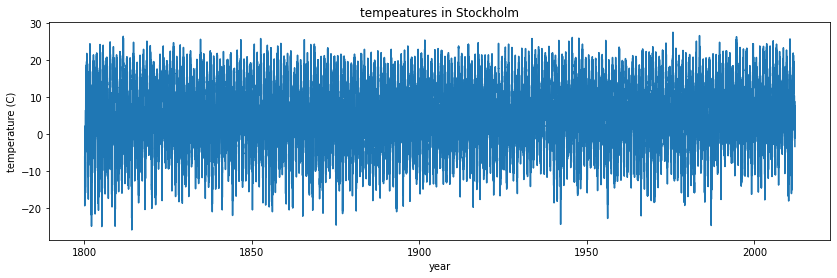

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

使用`numpy.savetxt`我们可以将一个Numpy数组以CSV格式存入:

In [32]:
M = np.random.rand(3,3)

M

array([[0.73171836, 0.46544202, 0.72372739],
       [0.32390603, 0.09679475, 0.95467059],
       [0.36051701, 0.78361037, 0.00716923]])

In [33]:
np.savetxt("random-matrix.csv", M)

In [34]:
!cat random-matrix.csv

7.317183558113176112e-01 4.654420244898096470e-01 7.237273924754552556e-01
3.239060308567449642e-01 9.679474636543183852e-02 9.546705930168928322e-01
3.605170063363589694e-01 7.836103655978251536e-01 7.169228636445423852e-03


In [35]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt 确定格式

!cat random-matrix.csv

0.73172 0.46544 0.72373
0.32391 0.09679 0.95467
0.36052 0.78361 0.00717


### Numpy 的本地文件格式

当存储和读取numpy数组时非常有用。利用函数`numpy.save`和`numpy.load`：

In [36]:
np.save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: data


In [37]:
np.load("random-matrix.npy")

array([[0.73171836, 0.46544202, 0.72372739],
       [0.32390603, 0.09679475, 0.95467059],
       [0.36051701, 0.78361037, 0.00716923]])

## 更多Numpy数组的性质

In [38]:
print(M.dtype)
print(M.itemsize) # 每个元素的字节数


float64
8


In [39]:
M.nbytes # 字节数

72

In [40]:
M.ndim # 维度

2

## 操作数组

### 索引

我们可以用方括号和下标索引元素：

In [41]:
v = np.array([1, 2, 3, 4, 5])
# v 是一个向量，仅仅只有一维，取一个索引
v[0]

1

In [42]:

# M 是一个矩阵或者是一个二维的数组，取两个索引 
print(M[1,1])
print(M[1][1])
print(M[1])

0.09679474636543184
0.09679474636543184
[0.32390603 0.09679475 0.95467059]


如果我们省略了一个多维数组的索引，它将会返回整行（或者，总的来说，一个 N-1 维的数组）

In [43]:
M

array([[0.73171836, 0.46544202, 0.72372739],
       [0.32390603, 0.09679475, 0.95467059],
       [0.36051701, 0.78361037, 0.00716923]])

In [44]:
M[1]

array([0.32390603, 0.09679475, 0.95467059])

相同的事情可以利用`:`而不是索引来实现：

In [45]:
M[1,:] # 行 1

array([0.32390603, 0.09679475, 0.95467059])

In [46]:
M[:,1] # 列 1

array([0.46544202, 0.09679475, 0.78361037])

我们可以用索引赋新的值给数组中的元素:

In [47]:
M[0,0] = 1

In [48]:
M

array([[1.        , 0.46544202, 0.72372739],
       [0.32390603, 0.09679475, 0.95467059],
       [0.36051701, 0.78361037, 0.00716923]])

In [49]:
# 对行和列也同样有用
M[1,:] = 0
M[:,2] = -1

In [50]:
M

array([[ 1.        ,  0.46544202, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.36051701,  0.78361037, -1.        ]])

### 切片索引

切片索引是语法`M[lower:upper:step]`的技术名称，用于提取数组的一部分：

In [51]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [52]:
A[1:3]

array([2, 3])

切片索引是*可变的*: 如果它们被分配了一个新值，那么从其中提取切片的原始数组将被修改：


In [53]:
A[1:3] = [-2,-3] # auto convert type
A[1:3] = np.array([-2, -3])  

A

array([ 1, -2, -3,  4,  5])

我们可以省略`M[lower:upper:step]`中任意的三个值
We can omit any of the three parameters in `M[lower:upper:step]`:

In [54]:
A[::] # lower, upper, step 都取默认值

array([ 1, -2, -3,  4,  5])

In [55]:
A[:]

array([ 1, -2, -3,  4,  5])

In [56]:
A[::2] # step is 2, lower and upper 代表数组的开始和结束

array([ 1, -3,  5])

In [57]:
A[:3] # 前3个元素

array([ 1, -2, -3])

In [58]:
A[3:] # 从索引3开始的元素

array([4, 5])

负索引计数从数组的结束(正索引从开始):

In [59]:
A = np.array([1,2,3,4,5])

In [60]:
A[-1] # 数组中最后一个元素

5

In [61]:
A[-3:] # 最后三个元素

array([3, 4, 5])

索引切片的工作方式与多维数组完全相同:

In [62]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [63]:
# 原始数组中的一个块
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [64]:
# 步长
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### 花式索引

Fancy索引是一个名称时，一个数组或列表被使用在一个索引:

In [65]:
row_indices = [1, 2, 3]
print(A[row_indices])
print(A)

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [66]:
col_indices = [1, 2, -1] # 索引-1 代表最后一个元素
A[row_indices, col_indices]

array([11, 22, 34])

我们也可以使用索引掩码:如果索引掩码是一个数据类型`bool`的Numpy数组，那么一个元素被选择(True)或不(False)取决于索引掩码在每个元素位置的值:

In [67]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [68]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [69]:
# 相同的事情
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

这个特性对于有条件地从数组中选择元素非常有用，例如使用比较运算符:

In [70]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [71]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [72]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

In [73]:
x[(3<x) * (x<6)]

array([3.5, 4. , 4.5, 5. , 5.5])

## 用于从数组中提取数据和创建数组的函数

### where

索引掩码可以使用`where`函数转换为位置索引

In [76]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [75]:
x[indices] # 这个索引等同于花式索引x[mask]

array([5.5, 6. , 6.5, 7. ])

### diag

使用diag函数，我们还可以提取一个数组的对角线和亚对角线:

In [74]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [75]:
diag(A, -1)

array([10, 21, 32, 43])

### take

`take` 函数和上面描述的花式索引类似

In [76]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [77]:
row_indices = [1, 3, 5]
v2[row_indices] # 花式索引

array([-2,  0,  2])

In [78]:
v2.take(row_indices)

array([-2,  0,  2])

但是`take`也作用在列表和其他的物体上：

In [79]:
take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

通过从几个数组中选择元素来构造一个数组:

In [49]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

## 线性代数

向量化代码是使用Python/Numpy编写高效数值计算的关键。这意味着尽可能多的程序应该用矩阵和向量运算来表示，比如矩阵-矩阵乘法。

### Scalar-array 操作

我们可以使用常用的算术运算符来对标量数组进行乘、加、减和除运算。

In [93]:
v1 = np.arange(0, 5)

In [94]:
v1 * 2

array([0, 2, 4, 6, 8])

In [95]:
v1 + 2

array([2, 3, 4, 5, 6])

In [96]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### 数组间的元素操作

当我们对数组进行加法、减法、乘法和除法时，默认的行为是**element-wise**操作：

In [97]:
A = np.random.rand(2, 3)

A * A # element-wise 乘法

array([[0.41002411, 0.52156709, 0.77687362],
       [0.86406459, 0.00587552, 0.04683701]])

In [98]:
v1 * v1

array([ 0,  1,  4,  9, 16])

如果我们用兼容的形状进行数组的乘法，我们会得到每一行的对位相乘结果：

In [99]:
A.shape, v1.shape

((2, 3), (5,))

In [100]:
A * v1

ValueError: operands could not be broadcast together with shapes (2,3) (5,) 

### 矩阵代数

那么矩阵的乘法呢?有两种方法。我们可以使用点函数，它对两个参数应用矩阵-矩阵、矩阵-向量或内向量乘法

In [102]:
A = np.random.rand(5, 5)
v = np.random.rand(5, 1)

np.dot(A, A)

array([[0.3767892 , 1.47079714, 0.31117826, 1.29726746, 0.51486767],
       [0.25604237, 0.97247777, 0.34479677, 0.93969314, 0.3976715 ],
       [0.81557228, 1.22841789, 0.86636095, 0.93499185, 0.28560187],
       [0.52515694, 1.56792282, 1.1443364 , 1.84965072, 0.74141231],
       [0.78004097, 1.51298694, 1.22023006, 1.42991218, 0.71648303]])

In [107]:
np.dot(A, v1)

array([3.03824466, 2.65209134, 2.94637897, 6.50153897, 5.54270391])

In [108]:
np.dot(v1, v1)

30

另外，我们可以将数组对象投到`matrix`类型上。这将改变标准算术运算符`+, -, *` 的行为，以使用矩阵代数。

In [111]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector

In [112]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [113]:
M * M

matrix([[0.3767892 , 1.47079714, 0.31117826, 1.29726746, 0.51486767],
        [0.25604237, 0.97247777, 0.34479677, 0.93969314, 0.3976715 ],
        [0.81557228, 1.22841789, 0.86636095, 0.93499185, 0.28560187],
        [0.52515694, 1.56792282, 1.1443364 , 1.84965072, 0.74141231],
        [0.78004097, 1.51298694, 1.22023006, 1.42991218, 0.71648303]])

In [114]:
M * v

matrix([[3.03824466],
        [2.65209134],
        [2.94637897],
        [6.50153897],
        [5.54270391]])

In [117]:
# 內积
v.T * v

matrix([[30]])

In [118]:
# 对于矩阵对象，适用标准的矩阵代数
v + M*v

matrix([[3.03824466],
        [3.65209134],
        [4.94637897],
        [9.50153897],
        [9.54270391]])

如果我们尝试用不相配的矩阵形状加，减或者乘我们会得到错误：

In [125]:
v = np.matrix([1,2,3,4,5,6]).T

In [123]:
np.shape(M), np.shape(v)

((5, 5), (5, 1))

In [124]:
M * v

matrix([[5.06458489],
        [4.08471675],
        [4.990684  ],
        [9.17423165],
        [8.08502244]])

同样了解相关的函数：`inner`, `outer`, `cross`, `kron`, `tensordot`。例如用`help(kron)`。

### 数组/矩阵转换

同样我们也用`.T`对矩阵目标`v`进行转置。我们也可以利用`transpose`函数去实现同样的事情。

变换矩阵对象的其他数学函数有:

In [126]:
A = np.random.rand(3,4)
print(A)
print(A.T)

[[0.04208911 0.65828119 0.21987187 0.10069326]
 [0.61960112 0.52726045 0.35884175 0.51931613]
 [0.66708619 0.76886997 0.06792093 0.6548313 ]]
[[0.04208911 0.61960112 0.66708619]
 [0.65828119 0.52726045 0.76886997]
 [0.21987187 0.35884175 0.06792093]
 [0.10069326 0.51931613 0.6548313 ]]


In [127]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [128]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

厄米共轭:转置+共轭

In [129]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

我们可以将复数数组的实部和虚部提取出来并用`real`和`imag`来表示:

In [130]:
real(C) # same as: C.real

matrix([[0., 0.],
        [0., 0.]])

In [131]:
imag(C) # same as: C.imag

matrix([[1., 2.],
        [3., 4.]])

或者说复数和绝对值

In [106]:
angle(C+1) # heads up MATLAB Users, angle is used instead of arg

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [107]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### 矩阵计算

#### 求逆

In [132]:
np.linalg.inv(C) # equivalent to C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [133]:
C.I * C

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [2.22044605e-16+0.j, 1.00000000e+00+0.j]])

#### 行列式

In [134]:
np.linalg.det(C)

(2.0000000000000004+0j)

In [135]:
linalg.det(C.I)

(0.49999999999999967+0j)

### 数据处理

通常将数据集存储在Numpy数组中是非常有用的。Numpy提供了许多函数用于计算数组中数据集的统计。

例如，让我们从上面使用的斯德哥尔摩温度数据集计算一些属性。

In [136]:
# 提醒一下，温度数据集存储在数据变量中:
np.shape(data)

(77431, 7)

#### mean

In [88]:
# 温度数据在第三列中
print(data.shape)
np.mean(data[:,3])

(77431, 7)


6.197109684751585

In [137]:
A = np.random.rand(4, 3)
np.mean(A)

0.4764047026464162

在过去的200年里，斯德哥尔摩每天的平均气温大约是6.2 C。

#### 标准差和方差

In [138]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### 最小值和最大值

In [139]:
# 最低日平均温度
data[:,3].min()

-25.8

In [140]:
# 最高日平均温度
data[:,3].max()

28.3

#### sum, prod, and trace

In [141]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:
# 将所有的元素相加
np.sum(d)

45

In [143]:
# 全元素积分
np.prod(d+1)

3628800

In [144]:
# 累计求和
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [147]:
# 累计成绩
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [148]:
# 计算对角线元素的和，和diag(A).sum()一样
np.trace(A)

1.04879166276667

### 数组子集的计算

我们可以使用索引、花式索引和从数组中提取数据的其他方法(如上所述)来计算数组中的数据子集。

例如，让我们回到温度数据集:

In [149]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


数据集的格式是：年，月，日，日平均气温，低，高，位置。

如果我们对某个特定月份的平均温度感兴趣，比如二月，然后我们可以创建一个索引掩码，使用它来选择当月的数据:

In [99]:
np.unique(data[:,1]) # 列的值从1到12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [150]:
mask_feb = data[:,1] == 2
print(mask_feb)

[False False False ... False False False]


In [151]:
# 温度数据实在第三行
print(np.mean(data[mask_feb,3]))
print(np.std(data[mask_feb,3]))

-3.212109570736596
5.090390768766271


有了这些工具，我们就有了非常强大的数据处理能力。例如，提取每年每个月的平均气温只需要几行代码:

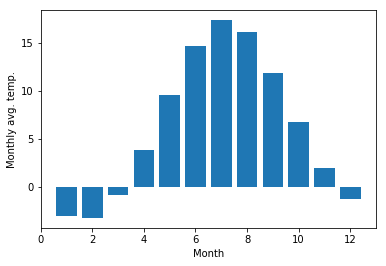

In [153]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### 高维数据的计算

当例如`min`, `max`等函数应用在高维数组上时，有时将计算应用于整个数组是有用的，而且很多时候有时只基于行或列。用`axis`参数我们可以决定这个函数应该怎样表现：

In [157]:
import numpy as np

m = np.random.rand(3,3)
m

array([[0.99782852, 0.15992805, 0.31262638],
       [0.51702607, 0.45658172, 0.66789036],
       [0.77771351, 0.42574723, 0.14011317]])

In [158]:
# global max
m.max()

0.997828517861979

In [159]:
# max in each column
m.max(axis=0)

array([0.99782852, 0.45658172, 0.66789036])

In [160]:
# max in each row
m.max(axis=1)

array([0.99782852, 0.66789036, 0.77771351])

许多其他的在`array` 和`matrix`类中的函数和方法接受同样（可选的）的关键字参数`axis`

## 阵列的重塑、调整大小和堆叠

Numpy数组的形状可以被确定而无需复制底层数据，这使得即使对于大型数组也能有较快的操作。

In [162]:
import numpy as np

A = np.random.rand(4, 3)
print(A)

[[0.97579482 0.78668761 0.61373444]
 [0.58850244 0.9784108  0.08465447]
 [0.57262123 0.44795615 0.75564229]
 [0.36770219 0.34095592 0.16259103]]


In [163]:
n, m = A.shape
print(n, m)

4 3


In [166]:
B = A.reshape((1,n*m))
B

array([[0.97579482, 0.78668761, 0.61373444, 0.58850244, 0.9784108 ,
        0.08465447, 0.57262123, 0.44795615, 0.75564229, 0.36770219,
        0.34095592, 0.16259103]])

In [167]:
B2 = A.reshape((n*m, 1))
print(B2)

[[0.97579482]
 [0.78668761]
 [0.61373444]
 [0.58850244]
 [0.9784108 ]
 [0.08465447]
 [0.57262123]
 [0.44795615]
 [0.75564229]
 [0.36770219]
 [0.34095592]
 [0.16259103]]


In [168]:
B[0,0:5] = 5 # modify the array

B

array([[5.        , 5.        , 5.        , 5.        , 5.        ,
        0.08465447, 0.57262123, 0.44795615, 0.75564229, 0.36770219,
        0.34095592, 0.16259103]])

In [169]:
A # and the original variable is also changed. B is only a different view of the same data

array([[5.        , 5.        , 5.        ],
       [5.        , 5.        , 0.08465447],
       [0.57262123, 0.44795615, 0.75564229],
       [0.36770219, 0.34095592, 0.16259103]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [170]:
B = A.flatten()

B

array([5.        , 5.        , 5.        , 5.        , 5.        ,
       0.08465447, 0.57262123, 0.44795615, 0.75564229, 0.36770219,
       0.34095592, 0.16259103])

In [171]:
print(B.shape)

(12,)


In [172]:
T = np.random.rand(3, 4, 5)
T2 = T.flatten()
print(T2)

[0.0643267  0.02070895 0.01127191 0.36318507 0.26309744 0.8332378
 0.79477743 0.52745619 0.35675021 0.55907373 0.18993756 0.15919449
 0.54789401 0.23186893 0.02898541 0.43545343 0.80684175 0.44014057
 0.05129167 0.95111801 0.40743132 0.57197596 0.6692788  0.80824496
 0.40301441 0.84369196 0.95294593 0.14876807 0.58005171 0.30849079
 0.27846197 0.01062528 0.62870079 0.6416306  0.76945123 0.39443503
 0.76619764 0.42833327 0.60720341 0.16246792 0.76067082 0.27134944
 0.36268568 0.78501742 0.36935191 0.43410334 0.10594888 0.12941728
 0.51760718 0.57260509 0.09756568 0.13216908 0.32918105 0.9338644
 0.71681907 0.58218819 0.58798528 0.81665138 0.73604797 0.91730101]


In [176]:
B[0:5] = 10

B

array([10.        , 10.        , 10.        , 10.        , 10.        ,
        0.08465447,  0.57262123,  0.44795615,  0.75564229,  0.36770219,
        0.34095592,  0.16259103])

In [177]:
A # 现在A并没有改变，因为B的数值是A的复制，并不指向同样的值。

array([[5.        , 5.        , 5.        ],
       [5.        , 5.        , 0.08465447],
       [0.57262123, 0.44795615, 0.75564229],
       [0.36770219, 0.34095592, 0.16259103]])

## 添加新的维度：newaxis

有了`newaxis`，我们可以在数组中插入新的维度，例如将一个向量转换为列或行矩阵：

In [178]:
v = np.array([1,2,3])

In [179]:
np.shape(v)

(3,)

In [180]:
print(v)

[1 2 3]


In [182]:
v2 = v.reshape(3, 1)
print(v2.shape)

(3, 1)


In [190]:
# 做一个向量v的列矩阵
v2 = v[:, np.newaxis]
print(v.shape)
print(v2.shape)


(3,)
(3, 1)


In [191]:
# 列矩阵
v[:,newaxis].shape

(3, 1)

In [144]:
# 行矩阵
v[newaxis,:].shape

(1, 3)

## 叠加和重复数组

利用函数`repeat`, `tile`, `vstack`, `hstack`, 和`concatenate` 我们可以用较小的向量和矩阵来创建更大的向量和矩阵：

### tile and repeat

In [192]:
a = np.array([[1, 2], [3, 4]])

In [194]:
print(a)

# 重复每一个元素三次
np.repeat(a, 3)

[[1 2]
 [3 4]]


array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [195]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [196]:
# 更好的方案
np.tile(a, (1, 3))

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [34]:
np.tile(a, (3, 1))

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

### concatenate

In [197]:
b = np.array([[5, 6]])

In [198]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [200]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [201]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [202]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## 复制和“深度复制”

为了获得高性能，Python中的赋值通常不复制底层对象。例如，在函数之间传递对象时，这一点非常重要，以避免不必要时大量的内存复制(技术术语:通过引用传递)。

In [203]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [204]:
# 现在B和A指的是同一个数组数据
B = A 

In [205]:
# 改变B影响A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [206]:
A

array([[10,  2],
       [ 3,  4]])

如果我们想避免这种行为，那么当我们从`A`中复制一个新的完全独立的对象`B`时，我们需要使用函数`copy`来做一个所谓的“深度复制”:

In [207]:
B = np.copy(A)

In [208]:
# 现在如果我们改变B，A不受影响
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [209]:
A

array([[10,  2],
       [ 3,  4]])

## 遍历数组元素

通常，我们希望尽可能避免遍历数组元素(不惜一切代价)。原因是在像Python(或MATLAB)这样的解释语言中，迭代与向量化操作相比真的很慢。

然而，有时迭代是不可避免的。对于这种情况，Python的For循环是最方便的遍历数组的方法:

In [210]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [211]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


当我们需要去
当我们需要遍历一个数组的每个元素并修改它的元素时，使用`enumerate`函数可以方便地在`for`循环中获得元素及其索引:

In [162]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

('row_idx', 0, 'row', array([1, 2]))
('col_idx', 0, 'element', 1)
('col_idx', 1, 'element', 2)
('row_idx', 1, 'row', array([3, 4]))
('col_idx', 0, 'element', 3)
('col_idx', 1, 'element', 4)


In [163]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [213]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [214]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [215]:
Theta_vec = np.vectorize(Theta)

In [216]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [217]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [219]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [221]:
a = np.array([-3,-2,-1,0,1,2,3])
b = a>=0
print(b)
b*1

[False False False  True  True  True  True]


array([0, 0, 0, 1, 1, 1, 1])

In [222]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [223]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [224]:
(M > 2).any()

True

In [225]:
if (M > 2).any():
    print("at least one element in M is larger than 2")
else:
    print("no element in M is larger than 2")

at least one element in M is larger than 2


In [226]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [227]:
M.dtype

dtype('int64')

In [228]:
M2 = M.astype(float)

M2

array([[1., 2.],
       [3., 4.]])

In [229]:
M2.dtype

dtype('float64')

In [230]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Versions

In [178]:
%reload_ext version_information

%version_information numpy

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
Sat Aug 15 11:02:09 2015 JST